### reformat data to strain_conc_position format


In [1]:
import numpy as np
import pandas as pd
from os import path, getcwd, walk, makedirs, rename
from subprocess import run
import sys
import time
from skimage import io

In [3]:
data_dir = path.join(path.dirname(getcwd()), 'data', '061422')
data_dir

'/scratch/gpfs/ziyangc/pilus/Pilus_Sensing/data/061422'

In [6]:
for parent_m, folder_m, file_m in walk(data_dir):
    if 'ref.txt' in file_m:
        print(parent_m)
        ref = {}
        for line in open(path.join(parent_m, 'ref.txt')):
            a = line.strip().split(',')
            ref[a[0]] = a[1:]
        ref['tp'].sort()
        for parent, folder, file in walk(parent_m):
            if 'tiff' in parent and not 'checkpoints' in parent:
                file.sort()
                pointer = 0
                # break
                print(parent)
                for strain in ref['strain']:
                    for conc in ref['conc']:
                        for pos in ref['pos']:
                            # print(strain, conc, pos, pointer)
                            output = np.empty([len(ref['tp']), 1024, 1024, 3])
                            j = 0
                            for f in file:
                                # print(f)
                                raw_stack = io.imread(path.join(parent, f))
                                output[j, ...] = raw_stack[pointer, ...]
                                j += 1
                            outpath = path.join(parent, '_'.join([strain, conc, pos])) + '.tiff'
                            if path.exists(outpath):
                                continue
                            # break
                            io.imsave(outpath, output)    
                            pointer += 1    

TiffFile.asarray: failed to reshape (12, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)


/scratch/gpfs/ziyangc/pilus/Pilus_Sensing/data/061422/2nd
/scratch/gpfs/ziyangc/pilus/Pilus_Sensing/data/061422/2nd/tiff


TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (12, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024, 1024)
TiffFile.asarray: failed to reshape (24, 1024, 1024) to (3, 1024

IndexError: index 4 is out of bounds for axis 0 with size 4

In [122]:
original = './tiff/12+-_15+-_120mim_6.tiff'
converted = './tiff/ZY12+_1.5_0.tiff'

In [123]:
ostack = io.imread(original)
channel = 1
oimg = ostack[0, ..., channel]
stack = io.imread(converted)
img = stack[2, ..., channel]

TiffFile.asarray: failed to reshape (72, 1024, 1024) to (3, 1024, 1024)


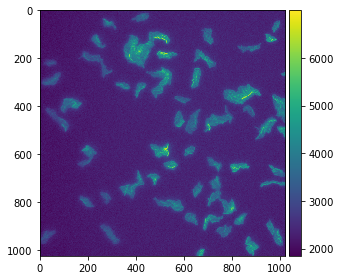

In [124]:
io.imshow(oimg)

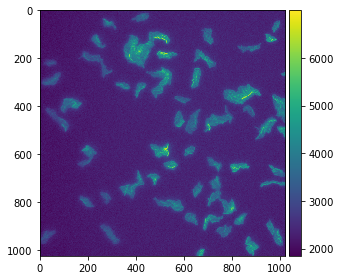

In [125]:
io.imshow(img)